In [1]:
# Installing pandas library, incase not installed
# You will need this library to clean, handle data, processing, analysis - 
# filter, sort, finding mean, median, and many many different things
!pip install pandas

In [2]:
# Import Pandas for data processing
import pandas as pd

In [3]:
# You are reading the CSV file here
dataset = pd.read_csv('StudentsSLR.csv')

# You are taking that dataset and creating a copy - we call this a DataFrame
df = dataset.copy()
df

# Why copy? Because you want to work on a separate version of the data 
# without modifying the original. It’s a safety step, good practice, etc.

,Hours_Studied,Score
0,0,34
1,1,36
2,1,33
3,1,39
4,1,42
5,2,45
6,2,38
7,3,45
8,3,53
9,3,46


In [4]:
# Split the data into X and Y

X = df.iloc[:, :-1] # X (independent variables / inputs): the data you use to make predictions.
                    # : means “take all rows". 
                    # :-1 means “take all columns except the last one”. 
                    # X will contain all columns except the last one.
Y = df.iloc[:, -1]  # Y (dependent variable / output): the value you want to predict.
                    # : means all rows.
                    # -1 means “the last column.”
                    # Y will be the last column of the DataFrame.

In [5]:
X

,Hours_Studied
0,0
1,1
2,1
3,1
4,1
5,2
6,2
7,3
8,3
9,3


In [6]:
Y

0     34
1     36
2     33
3     39
4     42
5     45
6     38
7     45
8     53
9     46
10    56
11    59
12    55
13    56
14    72
15    59
16    62
17    71
18    78
19    88
20    61
21    74
22    71
23    89
24    82
25    67
26    89
27    81
28    82
29    79
Name: Score, dtype: int64

In [7]:
# create the training and test datasets

# scikit-learn / sklearn - super popular machine learning library
# train_test_split is a helper function that splits your dataset 
# into training and testing parts.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = \
train_test_split(X, Y, test_size = 0.2, random_state=42)

# This takes your features (X) and target (Y) and splits them into 4 subsets:
# x_train -> training set features (independent variables).
# x_test -> test set features.
# y_train -> training set labels/targets.
# y_test -> test set labels.


In [8]:
# train the simple linear regression

# importing LinearRegression from scikit-learn’s linear_model module.
from sklearn.linear_model import LinearRegression
std_reg = LinearRegression()

# this is where you are training the model
std_reg.fit(x_train, y_train)

# after this, the model has learned the relationship between study hours and scores.

LinearRegression()

In [9]:
# This uses your trained Linear Regression model to generate predictions
# predict the results with test set data
y_predict = std_reg.predict(x_test)

# The purpose of y_predict is to compare against the actual test labels (y_test).
# Basically, you are checking how well did the model learn.
# The idea here is... If the predicted values are close to the actual values, the model is doing a good job.

In [10]:
# Look at the first few predictions
# Comparing predictions with actual results

print("Predicted:", y_predict[:5])
print("Actual   :", y_test[:5].values)

Predicted: [84.85949596 59.91714709 74.88255642 64.90561687 49.94020754]
Actual   : [81 59 89 71 53]


In [11]:
# get the R-Squared
# this number will be between 0-1. You want the number close to 1
slr_score = std_reg.score(x_test, y_test)
slr_score

0.8014559997289386

In [12]:
# Mean Absolute Error (MAE)
# absolute difference between predicted and actual values
# Basically, it's telling you... on average, your predictions are off by X points
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_predict)
print("MAE:", mae)

MAE: 5.33141162905617


In [13]:
# Root Mean Squared Error (RMSE)
# tells you... your predictions are typically within +/- X points.
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_predict))
print("RMSE:", rmse)

RMSE: 6.795441515926519


In [14]:
# "accuracy like" metric
accuracy = 100 - (mae / y_test.mean() * 100)
print("Approx Accuracy (%):", accuracy)

Approx Accuracy (%): 91.98283965555463


In [15]:
# Coefficient and Intercept
slr_coefficient = std_reg.coef_[0]  # Extracts the scalar
slr_intercept = std_reg.intercept_
print(slr_coefficient)
print(slr_intercept)

4.988469774337012
34.9747982210509


In [16]:
# Equation of the line
# y = 34.87 + 5.02 * X

In [17]:
# Ask for input
try:
    X = float(input("Enter the value of X: "))
    y = slr_intercept + slr_coefficient * X
    print(f"The calculated value of y is: {y}")
except ValueError:
    print("Please enter a valid number for X.")

Enter the value of X:  2


The calculated value of y is: 44.95173776972492


Using matplotlib backend: module://matplotlib_inline.backend_inline


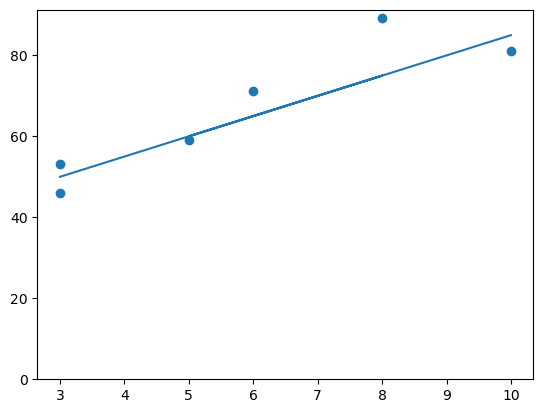

In [18]:
# plot the result using matplotlib
import matplotlib.pyplot as plt
%matplotlib
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict)
plt.ylim(ymin=0)
plt.show()